#### Artificial Neural Network

##### Data Exploration and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/harik/Data science Assignment/sonardataset.csv", header=None)
print(df.head())

       0       1       2       3       4       5       6       7       8   \
0     x_1     x_2     x_3     x_4     x_5     x_6     x_7     x_8     x_9   
1    0.02  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
2  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
3  0.0262  0.0582  0.1099  0.1083  0.0974   0.228  0.2431  0.3771  0.5598   
4    0.01  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   

       9   ...      51      52      53      54      55      56      57  \
0    x_10  ...    x_52    x_53    x_54    x_55    x_56    x_57    x_58   
1  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167   0.018  0.0084   
2  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191   0.014  0.0049   
3  0.6194  ...  0.0232  0.0166  0.0095   0.018  0.0244  0.0316  0.0164   
4  0.1264  ...  0.0121  0.0036   0.015  0.0085  0.0073   0.005  0.0044   

       58      59 60  
0    x_59    x_60  Y  
1   0.009  0.0032  R  
2  0.0052  0.0044  R  


In [3]:
print("Original shape:", df.shape)
print("Original classes:", df.iloc[:, -1].unique())

Original shape: (209, 61)
Original classes: ['Y' 'R' 'M']


In [4]:
df = df[df.iloc[:, -1] != 'Y']

print("After removing Y:")
print("Shape:", df.shape)
print("Classes:", df.iloc[:, -1].unique())

After removing Y:
Shape: (208, 61)
Classes: ['R' 'M']


In [5]:
# Encode target
df.iloc[:, -1] = df.iloc[:, -1].map({'R': 0, 'M': 1})

# Remove invalid rows
df = df.dropna(subset=[df.columns[-1]])

# Convert to NumPy
X = df.iloc[:, :-1].values.astype(np.float32)
y = df.iloc[:, -1].values.astype(np.int32)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam


In [11]:
model = Sequential([
    Input(shape=(60,)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 32)            │        1,952 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 32)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │           33 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model = Sequential([
    Input(shape=(60,)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_2 (Dense)               │ (None, 32)            │        1,952 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 32)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 1)             │           33 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5000 - loss: 0.9174 - val_accuracy: 0.5882 - val_loss: 0.7126
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4697 - loss: 0.8728 - val_accuracy: 0.6176 - val_loss: 0.6629
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5833 - loss: 0.7622 - val_accuracy: 0.7059 - val_loss: 0.6270
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5985 - loss: 0.6962 - val_accuracy: 0.7059 - val_loss: 0.5980
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6818 - loss: 0.6026 - val_accuracy: 0.6765 - val_loss: 0.5772
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7273 - loss: 0.5458 - val_accuracy: 0.7353 - val_loss: 0.5611
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6970 - loss: 0.5638 - val_accuracy: 0.7647 - val_loss: 0.5446
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.5125 - val_accuracy: 0.7647 - val_loss: 0.5330


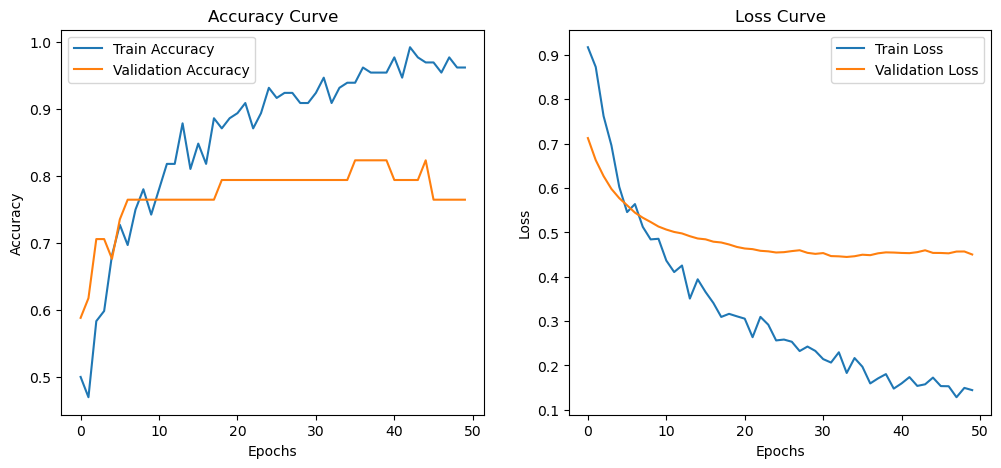

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [16]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("F1 Score      :", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Test Accuracy : 0.7380952380952381
Precision     : 1.0
Recall        : 0.5769230769230769
F1 Score      : 0.7317073170731707

Classification Report:

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        16
           1       1.00      0.58      0.73        26

    accuracy                           0.74        42
   macro avg       0.80      0.79      0.74        42
weighted avg       0.84      0.74      0.74        42



In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(60,)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5379 - loss: 0.8054 - val_accuracy: 0.6765 - val_loss: 0.5912
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5303 - loss: 0.7466 - val_accuracy: 0.7353 - val_loss: 0.5369
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6667 - loss: 0.6174 - val_accuracy: 0.8235 - val_loss: 0.5055
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7197 - loss: 0.5528 - val_accuracy: 0.8235 - val_loss: 0.4834
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7348 - loss: 0.5556 - val_accuracy: 0.7941 - val_loss: 0.4689
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7727 - loss: 0.5111 - val_accuracy: 0.7941 - val_loss: 0.4572
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7803 - loss: 0.4818 - val_accuracy: 0.8235 - val_loss: 0.4493
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7879 - loss: 0.4477 - val_accuracy: 0.8235 - val_loss: 0.4400
